In [165]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd

In [166]:
plt.rcParams["figure.figsize"] = (20, 10)

In [167]:
s_weather_df = pd.read_csv('SWeather2018.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_df)

,Datum,MedTemp,MaxTemp,MinTemp,Niederschlag,Monat,MedGlobalstrahlung,MedStarhlungBilanz
0,01.01.2014,6.2,9.8,2.4,0.00,1.0,44.9,-17.8
1,02.01.2014,7.0,10.0,4.8,1.60,1.0,24.3,-37.1
2,03.01.2014,7.8,10.8,4.3,0.30,1.0,22.4,-35.1
3,04.01.2014,7.7,9.7,5.6,1.33,1.0,11.9,-31.8
4,05.01.2014,5.8,8.6,1.4,0.72,1.0,29.1,-41.2
...,...,...,...,...,...,...,...,...
1885,01.03.2019,9.2,11.9,7.6,5.60,3.0,51.9,-1.5
1886,02.03.2019,9.2,12.3,7.1,0.00,3.0,54.0,16.4
1887,03.03.2019,11.1,13.6,7.7,0.00,3.0,59.6,11.6
1888,04.03.2019,9.9,14.3,4.8,4.40,3.0,72.0,-0.6


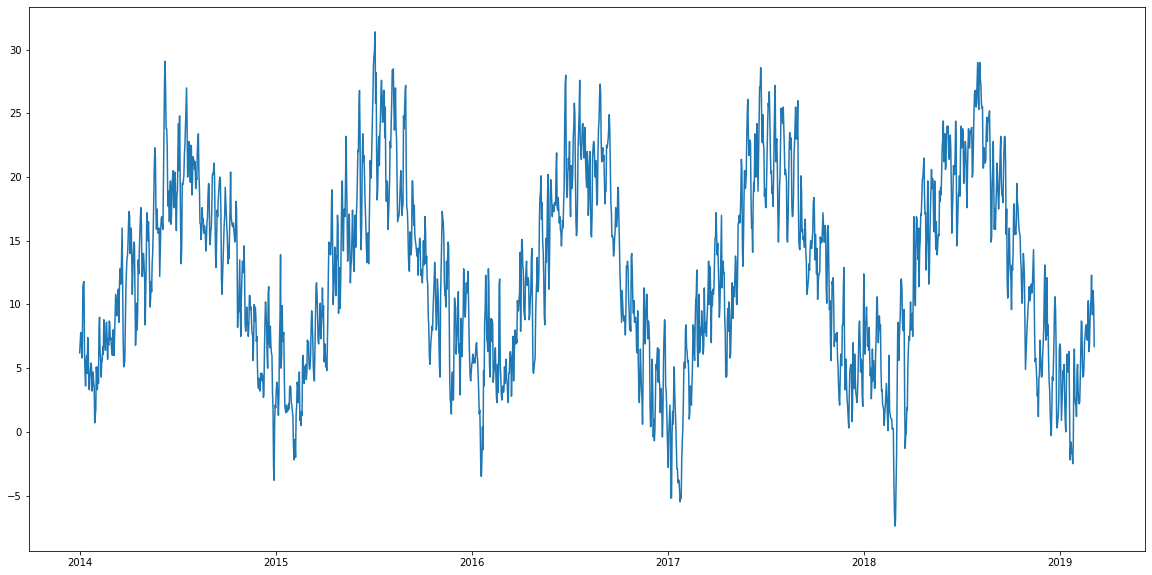

In [168]:
med_temp = s_weather_df['MedTemp']
dates = np.arange('2014-01-01', '2019-03-06', dtype='datetime64[D]')
plt.plot(dates, med_temp)
plt.show()
# plt.savefig('stuttgart_history.pdf')

In [169]:
s = s_weather_df['MedTemp']

In [171]:
lastN = 3
until = 1
cols = [1, 2, 3, 4, 5, 6, 7]
#cols = [1]

x = []
for i in range(lastN, s.size):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df.iloc[k, j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size):
    # y.append([s_weather_df.iloc[i, 1]])
    y_inputs = []
    for j in cols:
        y_inputs.append(s_weather_df.iloc[i, j])
    y.append(y_inputs)

for i in range(len(x)):    
    print(i, x[i], y[i])

0 [6.2, 7.0, 7.8, 9.8, 10.0, 10.8, 2.4, 4.8, 4.3, 0.0, 1.6, 0.3, 1.0, 1.0, 1.0, 44.9, 24.3, 22.4, -17.8, -37.1, -35.1] [7.7, 9.7, 5.6, 1.33, 1.0, 11.9, -31.8]
1 [7.0, 7.8, 7.7, 10.0, 10.8, 9.7, 4.8, 4.3, 5.6, 1.6, 0.3, 1.33, 1.0, 1.0, 1.0, 24.3, 22.4, 11.9, -37.1, -35.1, -31.8] [5.8, 8.6, 1.4, 0.72, 1.0, 29.1, -41.2]
2 [7.8, 7.7, 5.8, 10.8, 9.7, 8.6, 4.3, 5.6, 1.4, 0.3, 1.33, 0.72, 1.0, 1.0, 1.0, 22.4, 11.9, 29.1, -35.1, -31.8, -41.2] [7.1, 12.2, 1.0, 0.0, 1.0, 33.8, -10.0]
3 [7.7, 5.8, 7.1, 9.7, 8.6, 12.2, 5.6, 1.4, 1.0, 1.33, 0.72, 0.0, 1.0, 1.0, 1.0, 11.9, 29.1, 33.8, -31.8, -41.2, -10.0] [11.4, 14.5, 7.6, 0.0, 1.0, 27.1, -15.1]
4 [5.8, 7.1, 11.4, 8.6, 12.2, 14.5, 1.4, 1.0, 7.6, 0.72, 0.0, 0.0, 1.0, 1.0, 1.0, 29.1, 33.8, 27.1, -41.2, -10.0, -15.1] [11.7, 15.9, 8.6, 0.09, 1.0, 39.8, -23.1]
5 [7.1, 11.4, 11.7, 12.2, 14.5, 15.9, 1.0, 7.6, 8.6, 0.0, 0.0, 0.09, 1.0, 1.0, 1.0, 33.8, 27.1, 39.8, -10.0, -15.1, -23.1] [11.8, 17.1, 6.7, 4.05, 1.0, 45.7, -15.9]
6 [11.4, 11.7, 11.8, 14.5, 15.9,

455 [5.5, 5.8, 6.9, 8.3, 9.1, 14.4, 2.1, 3.1, 0.0, 2.08, 3.37, 0.0, 4.0, 4.0, 4.0, 171.9, 66.7, 209.0, 45.9, -11.7, 83.0] [5.1, 8.3, 3.7, 6.62, 4.0, 46.8, -11.4]
456 [5.8, 6.9, 5.1, 9.1, 14.4, 8.3, 3.1, 0.0, 3.7, 3.37, 0.0, 6.62, 4.0, 4.0, 4.0, 66.7, 209.0, 46.8, -11.7, 83.0, -11.4] [5.8, 9.9, 2.1, 0.0, 4.0, 166.6, 47.8]
457 [6.9, 5.1, 5.8, 14.4, 8.3, 9.9, 0.0, 3.7, 2.1, 0.0, 6.62, 0.0, 4.0, 4.0, 4.0, 209.0, 46.8, 166.6, 83.0, -11.4, 47.8] [4.8, 9.4, -0.3, 0.0, 4.0, 110.1, 22.2]
458 [5.1, 5.8, 4.8, 8.3, 9.9, 9.4, 3.7, 2.1, -0.3, 6.62, 0.0, 0.0, 4.0, 4.0, 4.0, 46.8, 166.6, 110.1, -11.4, 47.8, 22.2] [6.4, 13.1, -0.1, 0.0, 4.0, 239.2, 77.0]
459 [5.8, 4.8, 6.4, 9.9, 9.4, 13.1, 2.1, -0.3, -0.1, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 166.6, 110.1, 239.2, 47.8, 22.2, 77.0] [8.9, 16.3, 1.3, 0.0, 4.0, 238.9, 84.9]
460 [4.8, 6.4, 8.9, 9.4, 13.1, 16.3, -0.3, -0.1, 1.3, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 110.1, 239.2, 238.9, 22.2, 77.0, 84.9] [12.3, 20.8, 4.4, 0.0, 4.0, 227.7, 80.1]
461 [6.4, 8.9, 12.3, 13.1, 1

788 [3.6, 3.1, 3.3, 5.8, 4.3, 7.4, 1.6, 0.3, 0.4, 0.11, 0.83, 0.19, 2.0, 2.0, 3.0, 57.6, 8.5, 102.3, 3.6, -13.2, 27.9] [5.1, 9.2, 2.9, 3.12, 3.0, 41.5, -7.5]
789 [3.1, 3.3, 5.1, 4.3, 7.4, 9.2, 0.3, 0.4, 2.9, 0.83, 0.19, 3.12, 2.0, 3.0, 3.0, 8.5, 102.3, 41.5, -13.2, 27.9, -7.5] [3.8, 5.8, 2.0, 0.18, 3.0, 76.9, 11.8]
790 [3.3, 5.1, 3.8, 7.4, 9.2, 5.8, 0.4, 2.9, 2.0, 0.19, 3.12, 0.18, 3.0, 3.0, 3.0, 102.3, 41.5, 76.9, 27.9, -7.5, 11.8] [4.6, 8.0, 1.3, 0.79, 3.0, 76.8, 3.9]
791 [5.1, 3.8, 4.6, 9.2, 5.8, 8.0, 2.9, 2.0, 1.3, 3.12, 0.18, 0.79, 3.0, 3.0, 3.0, 41.5, 76.9, 76.8, -7.5, 11.8, 3.9] [5.7, 6.9, 4.0, 0.0, 3.0, 31.2, -10.8]
792 [3.8, 4.6, 5.7, 5.8, 8.0, 6.9, 2.0, 1.3, 4.0, 0.18, 0.79, 0.0, 3.0, 3.0, 3.0, 76.9, 76.8, 31.2, 11.8, 3.9, -10.8] [4.1, 6.2, 2.0, 1.18, 3.0, 91.0, 30.2]
793 [4.6, 5.7, 4.1, 8.0, 6.9, 6.2, 1.3, 4.0, 2.0, 0.79, 0.0, 1.18, 3.0, 3.0, 3.0, 76.8, 31.2, 91.0, 3.9, -10.8, 30.2] [3.9, 6.6, 1.6, 0.74, 3.0, 92.9, 8.3]
794 [5.7, 4.1, 3.9, 6.9, 6.2, 6.6, 4.0, 2.0, 1.6, 0.0, 

1121 [-2.1, -0.8, 0.2, 0.0, 7.7, 7.1, -4.7, -6.2, -4.6, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 29.3, 77.8, 76.5, -14.5, -20.3, -17.4] [2.3, 8.5, -2.7, 0.02, 1.0, 59.3, -9.2]
1122 [-0.8, 0.2, 2.3, 7.7, 7.1, 8.5, -6.2, -4.6, -2.7, 0.0, 0.0, 0.02, 1.0, 1.0, 1.0, 77.8, 76.5, 59.3, -20.3, -17.4, -9.2] [5.2, 7.6, 0.8, 2.49, 1.0, 22.1, -15.6]
1123 [0.2, 2.3, 5.2, 7.1, 8.5, 7.6, -4.6, -2.7, 0.8, 0.0, 0.02, 2.49, 1.0, 1.0, 1.0, 76.5, 59.3, 22.1, -17.4, -9.2, -15.6] [5.5, 8.2, 2.0, 2.56, 1.0, 2.6, -19.9]
1124 [2.3, 5.2, 5.5, 8.5, 7.6, 8.2, -2.7, 0.8, 2.0, 0.02, 2.49, 2.56, 1.0, 1.0, 1.0, 59.3, 22.1, 2.6, -9.2, -15.6, -19.9] [5.0, 7.8, 0.2, 0.0, 2.0, 27.1, 5.8]
1125 [5.2, 5.5, 5.0, 7.6, 8.2, 7.8, 0.8, 2.0, 0.2, 2.49, 2.56, 0.0, 1.0, 1.0, 2.0, 22.1, 2.6, 27.1, -15.6, -19.9, 5.8] [8.0, 13.4, 2.4, 0.0, 2.0, 52.5, 5.6]
1126 [5.5, 5.0, 8.0, 8.2, 7.8, 13.4, 2.0, 0.2, 2.4, 2.56, 0.0, 0.0, 1.0, 2.0, 2.0, 2.6, 27.1, 52.5, -19.9, 5.8, 5.6] [8.4, 13.0, 6.5, 0.0, 2.0, 42.5, -10.9]
1127 [5.0, 8.0, 8.4, 7.8, 13.4, 13.0

1454 [4.7, 5.7, 5.5, 8.5, 11.7, 7.6, 2.1, 2.0, 3.4, 0.0, 0.0, 0.1, 12.0, 12.0, 12.0, 47.4, 41.7, 15.4, -22.3, -33.9, -16.5] [2.9, 5.5, 0.2, 1.0, 12.0, 24.7, -24.0]
1455 [5.7, 5.5, 2.9, 11.7, 7.6, 5.5, 2.0, 3.4, 0.2, 0.0, 0.1, 1.0, 12.0, 12.0, 12.0, 41.7, 15.4, 24.7, -33.9, -16.5, -24.0] [2.0, 4.6, 0.0, 3.0, 12.0, 46.3, -24.9]
1456 [5.5, 2.9, 2.0, 7.6, 5.5, 4.6, 3.4, 0.2, 0.0, 0.1, 1.0, 3.0, 12.0, 12.0, 12.0, 15.4, 24.7, 46.3, -16.5, -24.0, -24.9] [7.6, 12.9, 3.6, 0.8, 12.0, 18.4, -15.6]
1457 [2.9, 2.0, 7.6, 5.5, 4.6, 12.9, 0.2, 0.0, 3.6, 1.0, 3.0, 0.8, 12.0, 12.0, 12.0, 24.7, 46.3, 18.4, -24.0, -24.9, -15.6] [12.4, 15.3, 9.4, 0.0, 12.0, 36.7, -13.3]
1458 [2.0, 7.6, 12.4, 4.6, 12.9, 15.3, 0.0, 3.6, 9.4, 3.0, 0.8, 0.0, 12.0, 12.0, 12.0, 46.3, 18.4, 36.7, -24.9, -15.6, -13.3] [8.4, 10.8, 6.9, 0.3, 1.0, 48.7, -28.4]
1459 [7.6, 12.4, 8.4, 12.9, 15.3, 10.8, 3.6, 9.4, 6.9, 0.8, 0.0, 0.3, 12.0, 12.0, 1.0, 18.4, 36.7, 48.7, -15.6, -13.3, -28.4] [6.1, 7.9, 4.0, 3.5, 1.0, 31.4, -22.6]
1460 [12.4,

1788 [7.2, 6.1, 5.1, 11.9, 11.7, 5.9, 4.0, 1.6, 4.3, 1.0, 0.0, 4.0, 11.0, 11.0, 11.0, 30.5, 63.9, 8.5, -12.8, -16.4, -19.6] [4.3, 5.1, 3.6, 0.5, 11.0, 9.7, -15.9]
1789 [6.1, 5.1, 4.3, 11.7, 5.9, 5.1, 1.6, 4.3, 3.6, 0.0, 4.0, 0.5, 11.0, 11.0, 11.0, 63.9, 8.5, 9.7, -16.4, -19.6, -15.9] [4.5, 7.0, 2.2, 0.0, 11.0, 39.6, -8.3]
1790 [5.1, 4.3, 4.5, 5.9, 5.1, 7.0, 4.3, 3.6, 2.2, 4.0, 0.5, 0.0, 11.0, 11.0, 11.0, 8.5, 9.7, 39.6, -19.6, -15.9, -8.3] [6.0, 9.4, 2.6, 0.0, 11.0, 37.5, -10.7]
1791 [4.3, 4.5, 6.0, 5.1, 7.0, 9.4, 3.6, 2.2, 2.6, 0.5, 0.0, 0.0, 11.0, 11.0, 11.0, 9.7, 39.6, 37.5, -15.9, -8.3, -10.7] [6.9, 8.9, 4.5, 2.4, 11.0, 13.7, -21.9]
1792 [4.5, 6.0, 6.9, 7.0, 9.4, 8.9, 2.2, 2.6, 4.5, 0.0, 0.0, 2.4, 11.0, 11.0, 11.0, 39.6, 37.5, 13.7, -8.3, -10.7, -21.9] [8.1, 11.2, 5.0, 0.0, 12.0, 47.9, -10.6]
1793 [6.0, 6.9, 8.1, 9.4, 8.9, 11.2, 2.6, 4.5, 5.0, 0.0, 2.4, 0.0, 11.0, 11.0, 12.0, 37.5, 13.7, 47.9, -10.7, -21.9, -10.6] [11.0, 13.8, 8.4, 1.1, 12.0, 25.6, -23.3]
1794 [6.9, 8.1, 11.0, 8.9,

In [172]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler().fit(x)
scalery = MinMaxScaler().fit(y)
x = scalerX.transform(x)
y = scalery.transform(y)



In [173]:
print(x)

[[0.35051546 0.37113402 0.39175258 ... 0.08979705 0.03614123 0.04170142]
 [0.37113402 0.39175258 0.38917526 ... 0.03614123 0.04170142 0.05087573]
 [0.39175258 0.38917526 0.34020619 ... 0.04170142 0.05087573 0.02474284]
 ...
 [0.50773196 0.42783505 0.42783505 ... 0.19071448 0.13511259 0.18487629]
 [0.42783505 0.42783505 0.47680412 ... 0.13511259 0.18487629 0.17153183]
 [0.42783505 0.47680412 0.44587629 ... 0.18487629 0.17153183 0.13761468]]


In [174]:
print(y)

[[0.38917526 0.33183857 0.4664723  ... 0.         0.02813918 0.05087573]
 [0.34020619 0.30717489 0.34402332 ... 0.         0.08018154 0.02474284]
 [0.37371134 0.38789238 0.33236152 ... 0.         0.09440242 0.11148179]
 ...
 [0.47680412 0.41928251 0.52769679 ... 0.18181818 0.17246596 0.17153183]
 [0.44587629 0.43497758 0.44314869 ... 0.18181818 0.20998487 0.13761468]
 [0.36340206 0.35201794 0.43731778 ... 0.18181818 0.25537065 0.1587434 ]]


In [176]:
layer = (32, 32, 32)
#model = MLPRegressor(layer, max_iter=5000, activation='logistic', solver='adam', verbose=True, n_iter_no_change=10, tol=0.0001)
model = MLPRegressor(layer, max_iter=5000, batch_size=64, activation='logistic', solver='adam', verbose=True, n_iter_no_change=200, tol=1e-9)
model.fit(x, y)

Iteration 1, loss = 0.07612423
Iteration 2, loss = 0.02295740
Iteration 3, loss = 0.02223995
Iteration 4, loss = 0.02207509
Iteration 5, loss = 0.02201125
Iteration 6, loss = 0.02194425
Iteration 7, loss = 0.02180637
Iteration 8, loss = 0.02164404
Iteration 9, loss = 0.02145667
Iteration 10, loss = 0.02118182
Iteration 11, loss = 0.02087418
Iteration 12, loss = 0.02037293
Iteration 13, loss = 0.01967247
Iteration 14, loss = 0.01876105
Iteration 15, loss = 0.01744067
Iteration 16, loss = 0.01564540
Iteration 17, loss = 0.01332409
Iteration 18, loss = 0.01075492
Iteration 19, loss = 0.00832274
Iteration 20, loss = 0.00660008
Iteration 21, loss = 0.00561190
Iteration 22, loss = 0.00512412
Iteration 23, loss = 0.00489040
Iteration 24, loss = 0.00474852
Iteration 25, loss = 0.00466713
Iteration 26, loss = 0.00462757
Iteration 27, loss = 0.00457639
Iteration 28, loss = 0.00454083
Iteration 29, loss = 0.00451736
Iteration 30, loss = 0.00449139
Iteration 31, loss = 0.00449639
Iteration 32, los

Iteration 257, loss = 0.00356930
Iteration 258, loss = 0.00359153
Iteration 259, loss = 0.00353972
Iteration 260, loss = 0.00355612
Iteration 261, loss = 0.00356107
Iteration 262, loss = 0.00356466
Iteration 263, loss = 0.00355826
Iteration 264, loss = 0.00355306
Iteration 265, loss = 0.00354533
Iteration 266, loss = 0.00357046
Iteration 267, loss = 0.00359653
Iteration 268, loss = 0.00354722
Iteration 269, loss = 0.00358049
Iteration 270, loss = 0.00354714
Iteration 271, loss = 0.00358141
Iteration 272, loss = 0.00358009
Iteration 273, loss = 0.00354040
Iteration 274, loss = 0.00353907
Iteration 275, loss = 0.00353609
Iteration 276, loss = 0.00352072
Iteration 277, loss = 0.00352333
Iteration 278, loss = 0.00353901
Iteration 279, loss = 0.00353526
Iteration 280, loss = 0.00354305
Iteration 281, loss = 0.00355111
Iteration 282, loss = 0.00355692
Iteration 283, loss = 0.00358483
Iteration 284, loss = 0.00357583
Iteration 285, loss = 0.00352412
Iteration 286, loss = 0.00354289
Iteration 

Iteration 507, loss = 0.00347335
Iteration 508, loss = 0.00343217
Iteration 509, loss = 0.00344371
Iteration 510, loss = 0.00345275
Iteration 511, loss = 0.00345571
Iteration 512, loss = 0.00349037
Iteration 513, loss = 0.00347154
Iteration 514, loss = 0.00350146
Iteration 515, loss = 0.00349922
Iteration 516, loss = 0.00347637
Iteration 517, loss = 0.00346368
Iteration 518, loss = 0.00345797
Iteration 519, loss = 0.00344048
Iteration 520, loss = 0.00346572
Iteration 521, loss = 0.00346493
Iteration 522, loss = 0.00350112
Iteration 523, loss = 0.00346302
Iteration 524, loss = 0.00344043
Iteration 525, loss = 0.00348163
Iteration 526, loss = 0.00344800
Iteration 527, loss = 0.00344986
Iteration 528, loss = 0.00344513
Iteration 529, loss = 0.00345461
Iteration 530, loss = 0.00345940
Iteration 531, loss = 0.00345595
Iteration 532, loss = 0.00344692
Iteration 533, loss = 0.00346266
Iteration 534, loss = 0.00345735
Iteration 535, loss = 0.00347427
Iteration 536, loss = 0.00344259
Iteration 

Iteration 762, loss = 0.00343479
Iteration 763, loss = 0.00343023
Iteration 764, loss = 0.00342293
Iteration 765, loss = 0.00341355
Iteration 766, loss = 0.00342119
Iteration 767, loss = 0.00341897
Iteration 768, loss = 0.00341682
Iteration 769, loss = 0.00342155
Iteration 770, loss = 0.00343652
Iteration 771, loss = 0.00341231
Iteration 772, loss = 0.00340528
Iteration 773, loss = 0.00340241
Iteration 774, loss = 0.00340042
Iteration 775, loss = 0.00340363
Iteration 776, loss = 0.00344959
Iteration 777, loss = 0.00344786
Iteration 778, loss = 0.00343882
Iteration 779, loss = 0.00340898
Iteration 780, loss = 0.00343626
Iteration 781, loss = 0.00343577
Iteration 782, loss = 0.00342914
Iteration 783, loss = 0.00342727
Iteration 784, loss = 0.00340896
Iteration 785, loss = 0.00341506
Iteration 786, loss = 0.00342111
Iteration 787, loss = 0.00343490
Iteration 788, loss = 0.00343228
Iteration 789, loss = 0.00348141
Iteration 790, loss = 0.00341491
Iteration 791, loss = 0.00347436
Iteration 

Iteration 1012, loss = 0.00341344
Iteration 1013, loss = 0.00343440
Iteration 1014, loss = 0.00340835
Iteration 1015, loss = 0.00341030
Iteration 1016, loss = 0.00342829
Iteration 1017, loss = 0.00342660
Iteration 1018, loss = 0.00341139
Iteration 1019, loss = 0.00340890
Iteration 1020, loss = 0.00340161
Iteration 1021, loss = 0.00343986
Iteration 1022, loss = 0.00344034
Iteration 1023, loss = 0.00341933
Iteration 1024, loss = 0.00342595
Iteration 1025, loss = 0.00341764
Iteration 1026, loss = 0.00343665
Iteration 1027, loss = 0.00340501
Iteration 1028, loss = 0.00340878
Iteration 1029, loss = 0.00344249
Iteration 1030, loss = 0.00342493
Iteration 1031, loss = 0.00342469
Iteration 1032, loss = 0.00340867
Iteration 1033, loss = 0.00340888
Iteration 1034, loss = 0.00341042
Iteration 1035, loss = 0.00341304
Iteration 1036, loss = 0.00343097
Iteration 1037, loss = 0.00342677
Iteration 1038, loss = 0.00343437
Iteration 1039, loss = 0.00343604
Iteration 1040, loss = 0.00342197
Iteration 1041

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=200, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-09,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [178]:
#y_predicted_sample = model.predict([[9.2, 10.2, 11.2, 6.0, 7.2, 12.9, 11.9, 16.0, 8, 11, 6.2, 7.9, 7.4, 3.6, 1.9]])
#y_should_sample = 7.3

#print('The predicted value is', y_predicted_sample)
#print('The real value was', y_should_sample)
print('Accuracy testing : {:.3f}'.format(model.score(x, y)))
print('Loss : {:.3f}'.format(model.loss_))

Accuracy testing : 0.862
Loss : 0.003


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [179]:
s_weather_to_predict_df = pd.read_csv('STemp201903.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_to_predict_df)

,Datum,A,B,C,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01.03.2019,9.2,11.9,7.6,5.6,3.0,51.9,-1.5
1,02.03.2019,9.2,12.3,7.1,0.0,3.0,54.0,16.4
2,03.03.2019,11.1,13.6,7.7,0.0,3.0,59.6,11.6
3,04.03.2019,9.9,14.3,4.8,4.4,3.0,72.0,-0.6
4,05.03.2019,6.7,10.6,4.6,2.9,3.0,87.0,7.0
...,...,...,...,...,...,...,...,...
209,26.09.2019,16.9,20.1,14.0,0.0,9.0,58.7,25.0
210,27.09.2019,17.2,20.4,14.6,3.6,9.0,56.3,4.0
211,28.09.2019,16.0,19.7,13.4,1.2,9.0,95.4,25.5
212,29.09.2019,17.4,24.6,11.8,0.3,9.0,137.7,38.3


In [186]:
tlen = s_weather_to_predict_df['A'].size
x_test = []

for i in range(lastN, tlen):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            #print(k, j)
            x_inputs.append(s_weather_to_predict_df.iloc[k, j])
    x_test.append(x_inputs)


    
y_test = []
for i in range(lastN, tlen):
    # y_test.append(s_weather_to_predict_df.iloc[i, 1])
    y_inputs = []
    for j in cols:
        #print(k, j)
        y_inputs.append(s_weather_to_predict_df.iloc[i, j])
    y_test.append(y_inputs)
    
print(y_test[0])
x_test

[9.9, 14.3, 4.8, 4.4, 3.0, 72.0, -0.6]


[[9.2,
  9.2,
  11.1,
  11.9,
  12.3,
  13.6,
  7.6,
  7.1,
  7.7,
  5.6,
  0.0,
  0.0,
  3.0,
  3.0,
  3.0,
  51.9,
  54.0,
  59.6,
  -1.5,
  16.4,
  11.6],
 [9.2,
  11.1,
  9.9,
  12.3,
  13.6,
  14.3,
  7.1,
  7.7,
  4.8,
  0.0,
  0.0,
  4.4,
  3.0,
  3.0,
  3.0,
  54.0,
  59.6,
  72.0,
  16.4,
  11.6,
  -0.6],
 [11.1,
  9.9,
  6.7,
  13.6,
  14.3,
  10.6,
  7.7,
  4.8,
  4.6,
  0.0,
  4.4,
  2.9,
  3.0,
  3.0,
  3.0,
  59.6,
  72.0,
  87.0,
  11.6,
  -0.6,
  7.0],
 [9.9,
  6.7,
  10.7,
  14.3,
  10.6,
  17.3,
  4.8,
  4.6,
  4.0,
  4.4,
  2.9,
  0.0,
  3.0,
  3.0,
  3.0,
  72.0,
  87.0,
  102.1,
  -0.6,
  7.0,
  23.1],
 [6.7,
  10.7,
  10.9,
  10.6,
  17.3,
  13.4,
  4.6,
  4.0,
  9.0,
  2.9,
  0.0,
  1.0,
  3.0,
  3.0,
  3.0,
  87.0,
  102.1,
  89.4,
  7.0,
  23.1,
  12.2],
 [10.7,
  10.9,
  9.2,
  17.3,
  13.4,
  12.9,
  4.0,
  9.0,
  6.2,
  0.0,
  1.0,
  0.1,
  3.0,
  3.0,
  3.0,
  102.1,
  89.4,
  121.9,
  23.1,
  12.2,
  31.6],
 [10.9,
  9.2,
  10.2,
  13.4,
  12.9,
  11.9,
  

In [187]:
x_test[0]

[9.2,
 9.2,
 11.1,
 11.9,
 12.3,
 13.6,
 7.6,
 7.1,
 7.7,
 5.6,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 51.9,
 54.0,
 59.6,
 -1.5,
 16.4,
 11.6]

In [188]:
y_predicted_test = model.predict([x_test[0]])
print(y_predicted_test)

[[ 1.1096311   1.20656131  0.93130872 -0.09130574  0.62435817  1.28287958
   0.71582438]]


In [189]:
x_test = scalerX.transform(x_test)
y_predicted = model.predict(x_test)

for i in range(10):
    print(i, y_test[i], y_predicted[i + 1])

0 [9.9, 14.3, 4.8, 4.4, 3.0, 72.0, -0.6] [0.42588515 0.40024489 0.47863416 0.03402134 0.1498347  0.27781764
 0.19640312]
1 [6.7, 10.6, 4.6, 2.9, 3.0, 87.0, 7.0] [0.36671606 0.35186062 0.41184177 0.02453184 0.15067293 0.28889836
 0.19133282]
2 [10.7, 17.3, 4.0, 0.0, 3.0, 102.1, 23.1] [0.48865824 0.47551175 0.52116419 0.02943544 0.1680421  0.34402566
 0.21023531]
3 [10.9, 13.4, 9.0, 1.0, 3.0, 89.4, 12.2] [0.44566615 0.42697483 0.48927247 0.03162667 0.1443684  0.29260044
 0.19063801]
4 [9.2, 12.9, 6.2, 0.1, 3.0, 121.9, 31.6] [0.41617533 0.41281302 0.43981348 0.01879297 0.16148984 0.34753378
 0.21622139]
5 [10.2, 11.9, 7.9, 0.2, 3.0, 51.0, 2.6] [0.45158104 0.42300829 0.5058321  0.03790348 0.15288818 0.2862398
 0.20984632]
6 [11.2, 16.0, 7.4, 5.7, 3.0, 98.6, 11.1] [0.46585288 0.44260709 0.51331521 0.03542136 0.1551063  0.29967446
 0.20209105]
7 [6.0, 8.0, 3.6, 0.0, 3.0, 105.3, 20.1] [0.32665502 0.32457954 0.35792336 0.01450828 0.15572427 0.31730502
 0.1993368 ]
8 [7.2, 11.0, 1.9, 0.0, 3.0, 

In [190]:
# y_predicted = y_predicted.reshape(-1, 1)
y_predicted

array([[0.46767455, 0.435866  , 0.52255999, ..., 0.15121081, 0.28198199,
        0.21492317],
       [0.42588515, 0.40024489, 0.47863416, ..., 0.1498347 , 0.27781764,
        0.19640312],
       [0.36671606, 0.35186062, 0.41184177, ..., 0.15067293, 0.28889836,
        0.19133282],
       ...,
       [0.62420261, 0.58088544, 0.70824813, ..., 0.72047528, 0.30209282,
        0.22817904],
       [0.59799423, 0.56779421, 0.66794257, ..., 0.71687959, 0.34017325,
        0.23561228],
       [0.65861756, 0.64482608, 0.71102088, ..., 0.72257134, 0.4054565 ,
        0.24043606]])

In [191]:
y_predicted = scalery.inverse_transform(y_predicted)

In [192]:
y_predicted

array([[ 10.74577236,  14.33962342,   7.52380755, ...,   2.66331896,
         95.79504731,  27.20786372],
       [  9.12434373,  12.75092193,   6.01715183, ...,   2.6481817 ,
         94.4187306 ,  20.54620333],
       [  6.82858295,  10.59298367,   3.72617275, ...,   2.65740228,
         98.08090723,  18.72241702],
       ...,
       [ 16.81906118,  20.80749076,  13.89291076, ...,   8.92522803,
        102.44167609,  31.97600073],
       [ 15.80217601,  20.22362166,  12.51043008, ...,   8.88567545,
        115.02726014,  34.64973823],
       [ 18.15436141,  23.65924339,  13.98801602, ...,   8.94828478,
        136.60337433,  36.38485009]])

In [193]:
print('Accuracy testing : {:.3f}'.format(model.score(x_test, y_test)))

Accuracy testing : -4.986


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [194]:
# yp = y_predicted[1:].ravel().tolist()
# yt = y_test[0:-1]


ValueError: x and y must have same first dimension, but have shapes (210,) and (1470,)

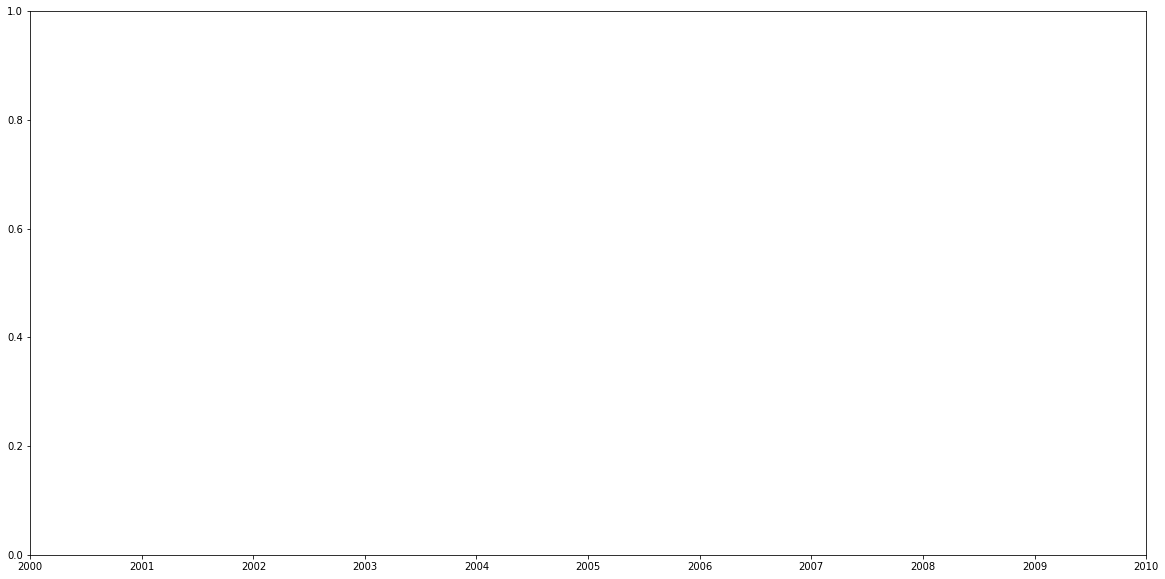

In [195]:
# dates2 = np.arange('2019-03-04', '2019-09-30', dtype='datetime64[D]')
# plt.plot(dates2, yp, c='blue')
# plt.plot(dates2, yt, c='red')

# plt.show()

In [196]:
yp = []
yt = []

for i in range(1, len(y_predicted)):
    yp.append(y_predicted[i][0])
    
for i in range(0, len(y_test) - 1):
    yt.append(y_test[i][0])
    

[9.12434372728309,
 6.828582947658784,
 11.559939775529784,
 9.891846695401709,
 8.747602738308036,
 10.121344224941451,
 10.675091882406308,
 5.274214694652889,
 7.970183896361997,
 7.765965605890722,
 6.49185149346106,
 10.318772538659308,
 11.043807064781515,
 11.246687476350687,
 5.935875678812663,
 7.293468273526895,
 7.267031318418671,
 9.85907454471922,
 11.45242530763899,
 11.697222415757803,
 10.25343977554711,
 7.169732014093933,
 7.914600751353256,
 9.125053903454988,
 9.209428682492234,
 11.95288888948075,
 12.44911986799536,
 13.044196971327711,
 13.273258582494574,
 15.157687611097838,
 11.682402434014632,
 6.519685616058076,
 9.317421476495069,
 10.821899747524311,
 11.906511479452929,
 12.09963913294929,
 11.929178782637463,
 11.42166056858075,
 9.222902783635663,
 8.02107489866518,
 7.011876984595221,
 7.935348135774071,
 11.883744697744882,
 12.573518260505496,
 14.630047649768857,
 15.056944190599758,
 16.542937021915748,
 16.588974599090086,
 16.540931224116452,
 16

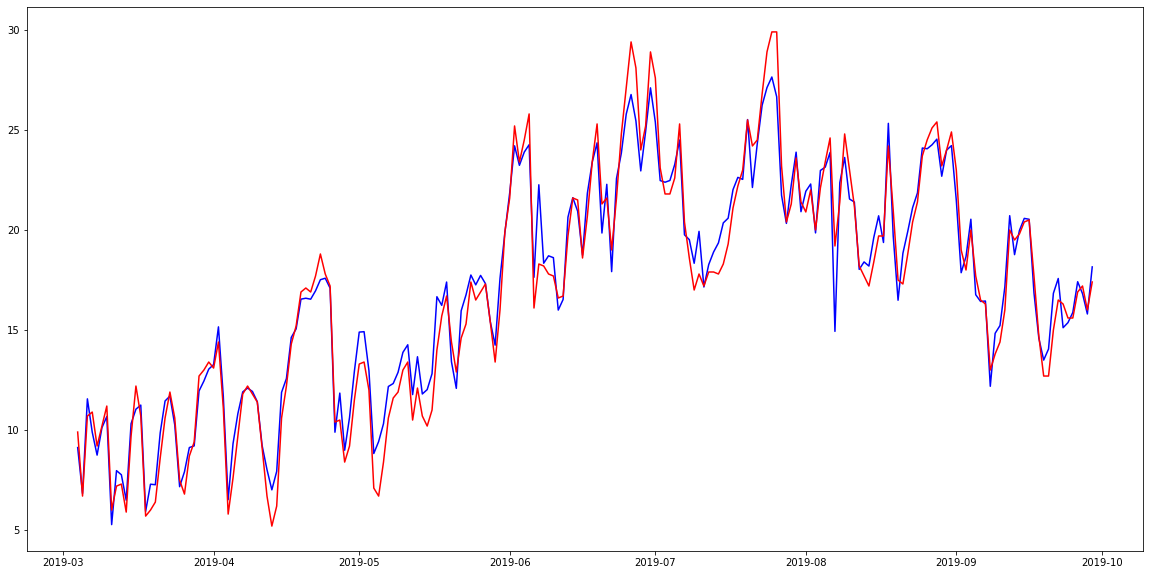

In [197]:
dates2 = np.arange('2019-03-04', '2019-09-30', dtype='datetime64[D]')
plt.plot(dates2, yp, c='blue')
plt.plot(dates2, yt, c='red')

plt.show()

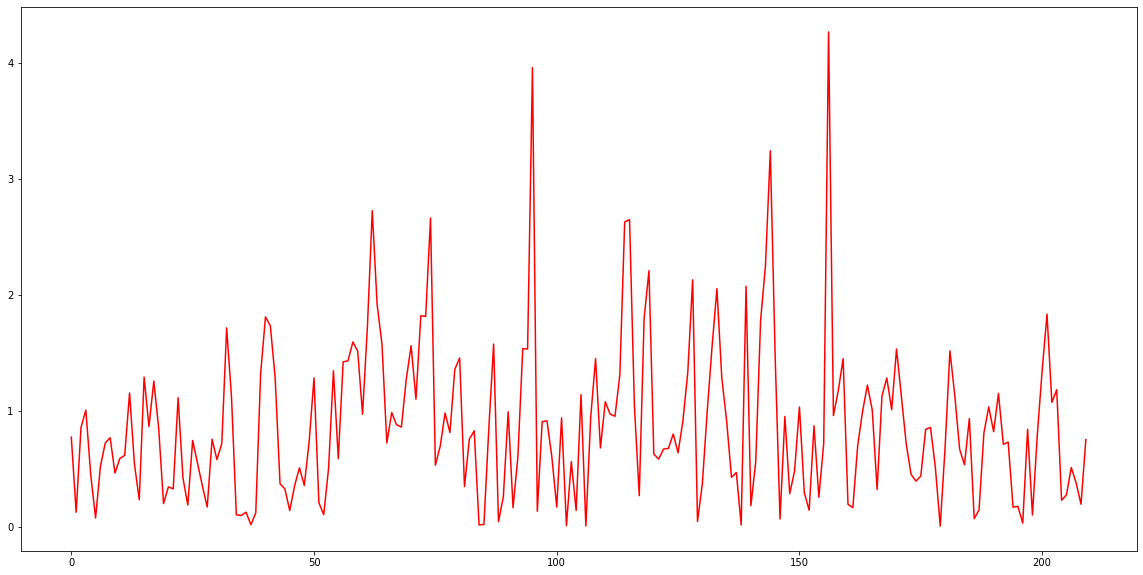

In [198]:
plt.plot(np.arange(len(yt)), np.abs(np.diff([yt, yp], axis=0)).ravel(), c='red')
plt.show()

In [199]:
print('Max abs error:', '%.10f' % np.max(np.abs(np.diff([yt, yp], axis=0).ravel())))
print('Min abs error:', '%.10f' % np.min(np.abs(np.diff([yt, yp], axis=0).ravel())))

Max abs error: 4.2675545077
Min abs error: 0.0092306272


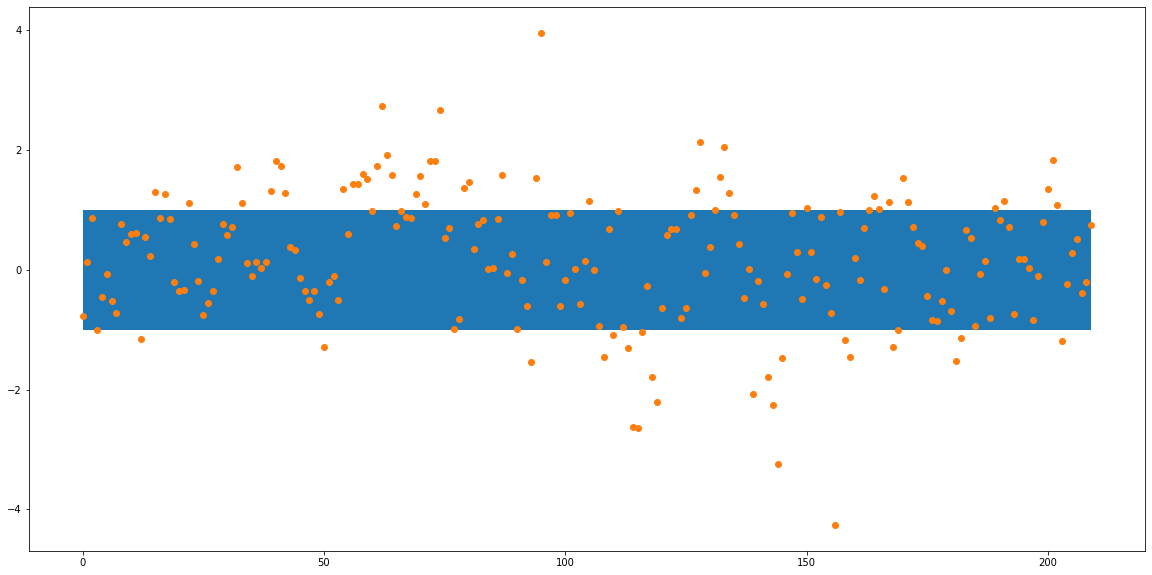

In [200]:
threshold = 1
plt.fill_between(np.arange(len(yp)), -threshold, threshold)
plt.scatter(np.arange(len(yp)), np.diff([yt, yp], axis=0))
plt.show()

In [201]:
ok_values = 0
bad_values = 0

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1
Amount of good values 139
Amount of bad values 71
Percentage good/bad: 0.6619047619047619 / 0.3380952380952381


In [202]:
ok_values = 0
bad_values = 0
threshold = 1.5

diffs = np.diff([np.around(yt), np.around(yp)], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1.5
Amount of good values 173
Amount of bad values 37
Percentage good/bad: 0.8238095238095238 / 0.1761904761904762


In [210]:
x_test_t = x_test[1:]
xtt = x_test_t[0]

diffs = []
random = 0

for i in range(random, len(yt)):
    predictscaled = model.predict([xtt])
    predict = scalery.inverse_transform(predictscaled).ravel()
    yi = yt[i]
    diffs.append(abs(predict[0] - yi))
    if i < len(yt) - 1 :
        # xtt = xtt[1:]
        # xtt = np.append(xtt, predictscaled)
        # xtt[2] = predictscaled
        xtt = xtt[7:]
        xtt = np.append(xtt, predictscaled)

print(diffs)


[0.7756562727169101, 5.803318124264056, 7.018026108770379, 1.8153850872240263, 0.5414129058566086, 0.32499841893481474, 1.4950521050139312, 8.204813768749982, 7.698294585838096, 8.086548558852748, 9.613607145962284, 5.721121107171722, 3.198797777961234, 4.616026890258514, 9.554363877236316, 9.278209206266052, 8.864672249426263, 6.665761652143528, 4.689833692428953, 3.3804966426510124, 4.683004783470231, 7.790729140655937, 8.481774195802647, 6.584282367300554, 5.886531007152868, 2.5817217917469595, 2.2845364085839606, 1.884909621471973, 2.182721564749455, 0.8847414311225599, 4.184303963081653, 9.48342014824145, 7.684600148690928, 5.584025863721264, 3.483789658343868, 3.0844018818335517, 3.4839518661652367, 3.8839825466264557, 6.184255292977582, 8.583965977669578, 10.084068761351514, 9.084162462907113, 4.684000910927981, 3.0840973921314383, 0.9841108206680786, 0.08403254652674441, 1.6158992338444218, 1.8159139290494188, 1.6159453477443453, 2.415904423107099, 3.5159236822863527, 2.5159322

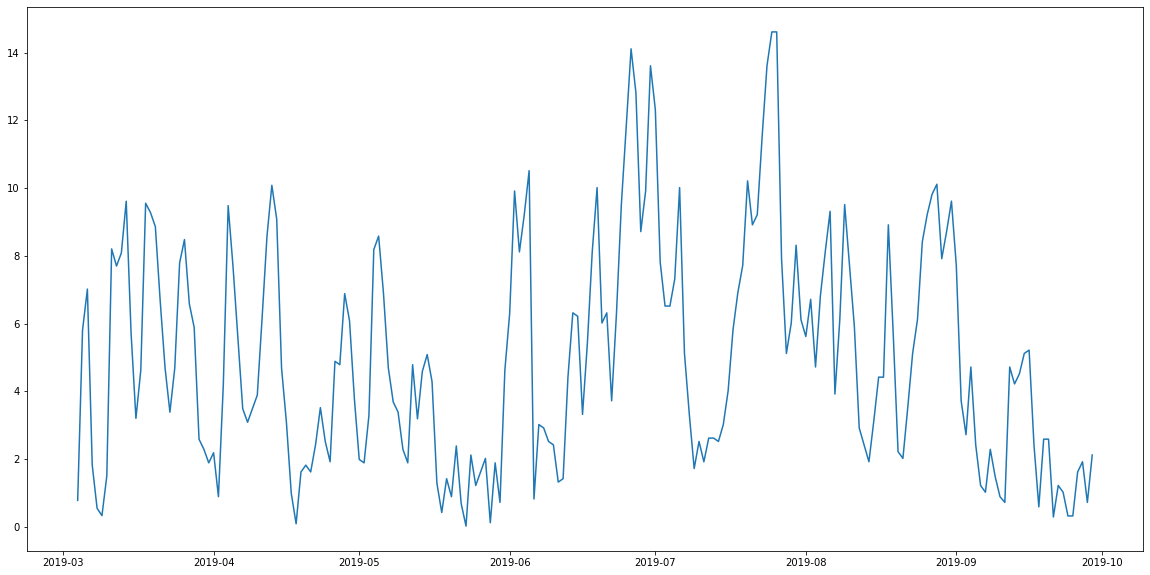

In [211]:
deltas = np.array(diffs)

plt.plot(dates2[random:], deltas)
plt.show()